<a href="https://colab.research.google.com/github/Kereophillus/AI-Coursework-2026/blob/main/Week-03-Knowledge-Representation/Knowledge_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### _Goal: Build a semantic network for a smart home and automate it with rules._

## ***Semantics/Ontologies***(_Properties_)

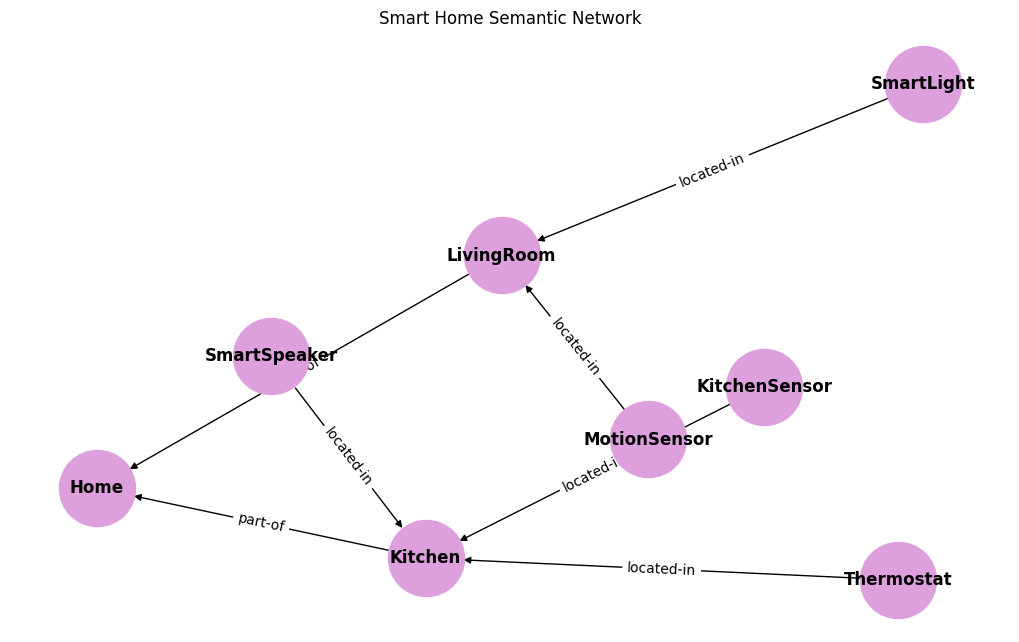

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Semantic Network
SmartHome = nx.DiGraph() # Directed graph because relationships have direction

# Define the Hierarchy (Knowledge Base)
nodes = [
    ("Home", {"type": "Location"}),
    ("LivingRoom", {"type": "Room"}),
    ("Kitchen", {"type": "Room"}),
    ("SmartLight", {"type": "Device"}),
    ("Thermostat", {"type": "Device"}),
    ("SmartSpeaker", {"type": "Device"}),
    ("MotionSensor", {"type": "Sensor"})
]
SmartHome.add_nodes_from(nodes)

# Define the Relationships (The "Semantics")
edges = [
    ("LivingRoom", "Home", "part-of"),
    ("Kitchen", "Home", "part-of"),
    ("SmartLight", "LivingRoom", "located-in"),
    ("MotionSensor", "LivingRoom", "located-in"),
    ("KitchenSensor", "Kitchen", "located-in"),
    ("SmartSpeaker", "Kitchen", "located-in"),
    ("Thermostat", "Kitchen", "located-in")

]

for u, v, rel in edges:
    SmartHome.add_edge(u, v, label=rel)

# Visualization
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(SmartHome)
nx.draw(SmartHome, pos, with_labels=True, node_color='plum', node_size=3000, font_weight='bold')
edge_labels = nx.get_edge_attributes(SmartHome, 'label')
nx.draw_networkx_edge_labels(SmartHome, pos, edge_labels=edge_labels)
plt.title("Smart Home Semantic Network")
plt.show()

## Rule Based System

In [8]:
def trigger_event(sensor_name, event_type):
    print(f"--- Event Detected: {sensor_name} reported {event_type} ---")

    # 1. Find where the sensor is located
    # We look for the edge where sensor -> room
    room = None
    for neighbor in SmartHome.neighbors(sensor_name):
        if SmartHome[sensor_name][neighbor]['label'] == 'located-in':
            room = neighbor
            break

    if room:
        print(f"Searching for devices in {room}...")

        # 2. Find all devices located in that room
        for device, target_room in SmartHome.edges():
            if target_room == room and SmartHome[device][target_room]['label'] == 'located-in':
                if device != sensor_name: # Don't trigger the sensor itself
                    print(f"ACTION: Turning ON {device} in {room}")

# Test the system
#trigger_event("MotionSensor", "Movement")
trigger_event("KitchenSensor", "Movement")

--- Event Detected: KitchenSensor reported Movement ---
Searching for devices in Kitchen...
ACTION: Turning ON Thermostat in Kitchen
ACTION: Turning ON SmartSpeaker in Kitchen
